# Classification Exercise

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
train_dataset = pd.read_csv('https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_train.csv')

train_dataset

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,>4,46,0
...,...,...,...,...,...,...,...,...,...,...,...
2095,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,NaN,4,4,0
2096,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,Funded Startup,2,10,1
2097,0.855,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,never,37,0
2098,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,11,0


In [3]:
test_dataset = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/classification/data/Assigment/aug_test.csv")

test_dataset

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,NaN,Has relevent experience,Full time course,Graduate,Other,3,Pvt Ltd,1,134,0
1,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,5,Early Stage Startup,1,34,1
2,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,10,Pvt Ltd,2,90,0
3,0.910,Male,No relevent experience,NaN,High School,NaN,10,NaN,never,42,0
4,0.624,Male,Has relevent experience,Part time course,Graduate,STEM,3,Pvt Ltd,1,198,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,never,139,0
96,0.926,Male,No relevent experience,no_enrollment,Masters,STEM,10,NaN,2,45,1
97,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,7,NaN,1,22,0
98,0.939,Male,No relevent experience,Full time course,High School,NaN,7,NaN,1,182,0


### Data clean, imputation

1. in experience, replace >20 to 21; <1 to 1, and convert this as a numerical column.

#### Train Data

In [5]:
train_dataset['experience'] = train_dataset['experience'].replace({"<1": 1, ">20": 21}).astype(float)

#### Test Data

In [9]:
test_dataset['experience'] = test_dataset['experience'].replace({"<1": 1, ">20": 21}).astype(float)

2. in last_new_job, replace >4 to 5; never to 0, and convert this as a numerical column

#### Train Data

In [12]:
train_dataset['last_new_job'] = train_dataset['last_new_job'].replace({">4": 5, "never": 0}).astype(float)

#### Test Data

In [16]:
test_dataset['last_new_job'] = test_dataset['last_new_job'].replace({">4": 5, "never": 0}).astype(float)

3. If the column is categorical, impute the missing value as its mode. If the column is numerical, impute the missing value as its median

#### Train Data

In [18]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2100 non-null   float64
 1   gender                  1585 non-null   object 
 2   relevent_experience     2100 non-null   object 
 3   enrolled_university     2051 non-null   object 
 4   education_level         2049 non-null   object 
 5   major_discipline        1768 non-null   object 
 6   experience              2090 non-null   float64
 7   company_type            1415 non-null   object 
 8   last_new_job            2048 non-null   float64
 9   training_hours          2100 non-null   int64  
 10  target                  2100 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 180.6+ KB


In [19]:
train_dataset.isna().sum()

city_development_index      0
gender                    515
relevent_experience         0
enrolled_university        49
education_level            51
major_discipline          332
experience                 10
company_type              685
last_new_job               52
training_hours              0
target                      0
dtype: int64

In [20]:
train_dataset["gender"] = train_dataset["gender"].fillna(train_dataset["gender"].mode()[0])
train_dataset["enrolled_university"] = train_dataset["enrolled_university"].fillna(train_dataset["enrolled_university"].mode()[0])
train_dataset["education_level"] = train_dataset["education_level"].fillna(train_dataset["education_level"].mode()[0])
train_dataset["major_discipline"] = train_dataset["major_discipline"].fillna(train_dataset["major_discipline"].mode()[0])
train_dataset["experience"] = train_dataset["experience"].fillna(train_dataset["experience"].median())
train_dataset["company_type"] = train_dataset["company_type"].fillna(train_dataset["company_type"].mode()[0])
train_dataset["last_new_job"] = train_dataset["last_new_job"].fillna(train_dataset["last_new_job"].median())

In [21]:
train_dataset.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### Test Data

In [22]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  100 non-null    float64
 1   gender                  72 non-null     object 
 2   relevent_experience     100 non-null    object 
 3   enrolled_university     96 non-null     object 
 4   education_level         98 non-null     object 
 5   major_discipline        88 non-null     object 
 6   experience              100 non-null    float64
 7   company_type            64 non-null     object 
 8   last_new_job            100 non-null    float64
 9   training_hours          100 non-null    int64  
 10  target                  100 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 8.7+ KB


In [23]:
test_dataset.isna().sum()

city_development_index     0
gender                    28
relevent_experience        0
enrolled_university        4
education_level            2
major_discipline          12
experience                 0
company_type              36
last_new_job               0
training_hours             0
target                     0
dtype: int64

In [24]:
test_dataset["gender"] = test_dataset["gender"].fillna(test_dataset["gender"].mode()[0])
test_dataset["enrolled_university"] = test_dataset["enrolled_university"].fillna(test_dataset["enrolled_university"].mode()[0])
test_dataset["education_level"] = test_dataset["education_level"].fillna(test_dataset["education_level"].mode()[0])
test_dataset["major_discipline"] = test_dataset["major_discipline"].fillna(test_dataset["major_discipline"].mode()[0])
test_dataset["company_type"] = test_dataset["company_type"].fillna(test_dataset["company_type"].mode()[0])

In [25]:
test_dataset.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Classification

In [26]:
columns_to_encode = ["gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "company_type"]

encoder = LabelEncoder()

for column in columns_to_encode:
    train_dataset[column] = encoder.fit_transform(train_dataset[column])
    test_dataset[column] = encoder.fit_transform(test_dataset[column])
    print(f"Spalte '{column}':")
    for original_category, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"\t{original_category}: {encoded_value}")

Spalte 'gender':
	Female: 0
	Male: 1
	Other: 2
Spalte 'relevent_experience':
	Has relevent experience: 0
	No relevent experience: 1
Spalte 'enrolled_university':
	Full time course: 0
	Part time course: 1
	no_enrollment: 2
Spalte 'education_level':
	Graduate: 0
	High School: 1
	Masters: 2
Spalte 'major_discipline':
	Arts: 0
	Business Degree: 1
	Humanities: 2
	Other: 3
	STEM: 4
Spalte 'company_type':
	Early Stage Startup: 0
	Funded Startup: 1
	NGO: 2
	Public Sector: 3
	Pvt Ltd: 4


In [27]:
X_train = train_dataset.drop(columns=['target'])
y_train = train_dataset['target']

X_test = test_dataset.drop(columns=['target'])
y_test = test_dataset['target']

In [28]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

1. Build a classification model from the training set ( you can use any algorithms)

In [29]:
results = []
names_of_models = []

rfc_parameter = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 1, 5, 10, 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

lg_parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],  # Beachte: 'l1' benötigt solver='liblinear' oder 'saga'
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
    }

svc_parameter = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Nur für 'poly' relevant
    'coef0': [0.0, 0.1, 0.5],  # Für 'poly' und 'sigmoid' relevant
    'class_weight': [None, 'balanced']
}

knn_parameter = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

dtc_parameter = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 1, 5, 10, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

# Helper function to ensure all parameter values are lists
def ensure_list(param_dict):
    for key in param_dict:
        if not isinstance(param_dict[key], list):
            param_dict[key] = [param_dict[key]]
    return param_dict

def create_rfc_param_grid(params):
    param_grid = list(ParameterGrid(params))
    filtered_param_grid = []
    for param_combination in param_grid:
        if param_combination['oob_score'] == True and param_combination['bootstrap'] == False:
            continue
        filtered_param_grid.append(ensure_list(param_combination))
    return filtered_param_grid

# Filterfunktion für Logistic Regression
def create_lg_param_grid(params):
    param_grid = list(ParameterGrid(params))
    filtered_param_grid = []
    for param_combination in param_grid:
        if param_combination['penalty'] == 'l2' and param_combination['solver'] in ['newton-cg', 'lbfgs', 'liblinear', 'saga']:
            filtered_param_grid.append(ensure_list(param_combination))
        elif param_combination['penalty'] == 'none' and param_combination['solver'] in ['newton-cg', 'lbfgs', 'saga']:
            filtered_param_grid.append(ensure_list(param_combination))
    return filtered_param_grid

# Filterfunktion für SVC
def create_svc_param_grid(params):
    param_grid = list(ParameterGrid(params))
    filtered_param_grid = []
    for param_combination in param_grid:
        if param_combination['kernel'] == 'poly':
            filtered_param_grid.append(ensure_list(param_combination))
        elif param_combination['kernel'] in ['linear', 'rbf']:
            param_combination.pop('degree', None)
            param_combination.pop('coef0', None)
            filtered_param_grid.append(ensure_list(param_combination))
        elif param_combination['kernel'] == 'sigmoid':
            param_combination.pop('degree', None)
            filtered_param_grid.append(ensure_list(param_combination))
    return filtered_param_grid

filtered_rfc_parameters = create_rfc_param_grid(rfc_parameter)
filtered_lg_parameters = create_lg_param_grid(lg_parameters)
filtered_svc_parameters = create_svc_param_grid(svc_parameter)

model_list = [
               ('RFC', RandomForestClassifier(random_state=1), filtered_rfc_parameters),
               ('LR', LogisticRegression(random_state=1), filtered_lg_parameters),
               ('SVC', SVC(random_state=1), filtered_svc_parameters),
               ('KNN', KNeighborsClassifier(), knn_parameter),
               ('DTC', DecisionTreeClassifier(random_state=1), dtc_parameter),
            ]

for name, model, parameters_for_testing in model_list:
    kfold = KFold(n_splits=5)
    grid_cv = GridSearchCV(estimator=model, param_grid=parameters_for_testing, scoring='accuracy', cv=kfold)
    result = grid_cv.fit(scaled_X_train, y_train)

    print("{}: Best {} using {}".format(name, result.best_score_, result.best_params_))

RFC: Best 0.778095238095238 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'oob_score': True}
LR: Best 0.7661904761904761 using {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
SVC: Best 0.7652380952380952 using {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
KNN: Best 0.7538095238095238 using {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
DTC: Best 0.7823809523809524 using {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [30]:
min_impurity_decrease = 0.01

tuned_model_dtc = DecisionTreeClassifier(random_state=1, min_impurity_decrease=min_impurity_decrease)
tuned_model_dtc.fit(scaled_X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=1)

2. generate the confusion matrix and calculate the accuracy, precision, recall, and F1-score on training set. 

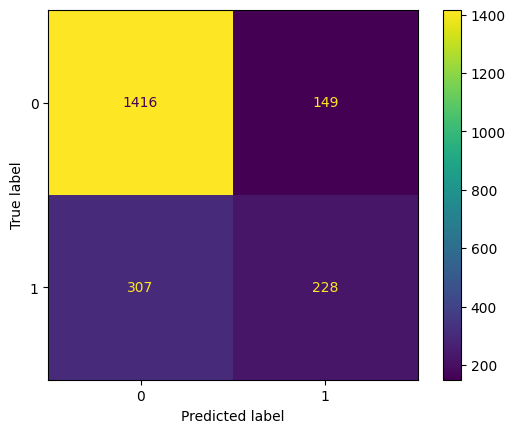

In [31]:
train_predictions = tuned_model_dtc.predict(scaled_X_train)

train_cm = confusion_matrix(y_train, train_predictions,labels=tuned_model_dtc.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm,
                               display_labels=tuned_model_dtc.classes_)
train_disp.plot()

In [32]:
print(classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1565
           1       0.60      0.43      0.50       535

    accuracy                           0.78      2100
   macro avg       0.71      0.67      0.68      2100
weighted avg       0.77      0.78      0.77      2100



3. Applying the model in the test set and generating the prediction

In [33]:
test_predictions = tuned_model_dtc.predict(scaled_X_test)

4. generate the confusion matrix from the test set and calculate the accuracy, precision, recall, and F1-score

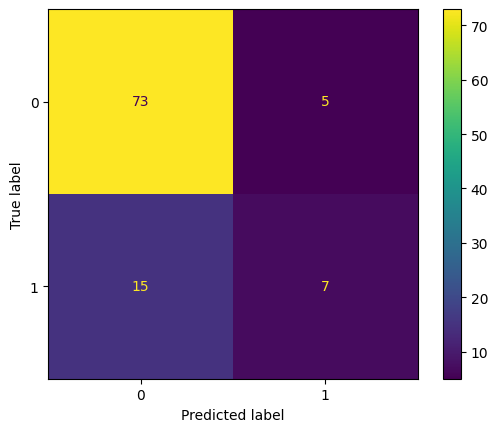

In [34]:
test_cm = confusion_matrix(y_test, test_predictions,labels=tuned_model_dtc.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm,
                               display_labels=tuned_model_dtc.classes_)
test_disp.plot()

In [36]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        78
           1       0.58      0.32      0.41        22

    accuracy                           0.80       100
   macro avg       0.71      0.63      0.65       100
weighted avg       0.78      0.80      0.78       100



5. compare the results between the training and test set

Die Accuracy ist mit 0.8 auf den Testdaten sogar etwas höher als auf den Trainingsdaten, wo die Accuracy 0.78 beträgt. Das heißt von den Trainingsdaten wurden 78% richtig klassifiziert und von den Testdaten 80%.

Im Falle, dass jemand keinen Job Wechsel anstrebt, sind Precision, Recall und F1-Score bei den Testdaten ebenfalls höher als bei den Trainingsdaten, wenn auch nur geringfügig. Bei den Testdaten wurden 83% der als "kein Jobwechsel" klassifizierten auch richtig klassifiziert. Bei den Trainingsdaten waren es 82%. Insgesamt wurden, bei den Trainingsdaten, von allen Personen, die den Job nicht wechseln möchten 90% identifiziert. Bei den Testdaten waren es sogar 94%.

Möchte jemand den Job wechseln, schneiden dagegen die Trainingsdaten bei Precision, Recall und F1-Score besser ab als bei den Testdaten. Bei den Testdaten wurden lediglich 58% der "möchte Jobwechsel" Klassifizierungen richtig klassifiziert und bei den Trainingsdaten waren es 60%. Von allen Personen, die den Job wechseln möchten, wurden in den Trainingsdaten 43% identifiziert. Bei den Testdaten waren es sogar nur 32%.